# **_Korean Baseball Pitching_**
## By
# **_Christian Huerta_**

# **_Questions_**:
1. #### What is the average ERA (Earned Run Average) across teams?
2. #### Is there a correlation between the age of players and their ERA?
3. #### Which team has the highest average runs per game?
4. #### What is the average hits per 9 innings (H/9) for each team?
5. #### What is the distribution of wins and losses across teams?
6. #### What is the average strikeouts per 9 innings (K/9) for each team?
7. #### What are the top five teams with the most strikeouts? 
8. #### Which team has the highest WHIP (Walks plus Hits per Inning Pitched) on average? 
9. #### What team has the highest average of homeruns per 9 innings? 
10. #### What is the distribution of wild pitches and hit batters across different teams?

# **_Import Libraries_**:

In [490]:
# Importing pandas for data manipulation
import pandas as pd
# Importing numpy for numerical operations
import numpy as np
# Importing matplotlib for data visualization
import matplotlib.pyplot as plt
# Importing scipy
from scipy import stats
# Importing seaborn for advanced data visualization
import seaborn as sns
# Setting the seaborn style for the plots
sns.set()

# **_Import Data:_**

In [443]:
# Reading the dataset into a pandas DataFrame
df = pd.read_csv('Korean Baseball.csv')

# **_Inspect Data:_**

In [444]:
# Reading the first 5 rows.
df.head()

,id,year,team,average_age,runs_per_game,wins,losses,win_loss_percentage,ERA,run_average_9,...,hit_batter,balks,wild_pitches,batters_faced,WHIP,hits_9,homeruns_9,walks_9,strikeouts_9,strikeout_walk
0,1,2021,LG Twins,26.3,3.90,72,57,0.558,3.57,3.96,...,97,5.0,43.0,5416,1.312,8.0,0.6,3.9,7.6,1.96
1,2,2021,KT Wiz,28.4,4.06,75,59,0.560,3.67,4.17,...,42,1.0,56.0,5359,1.316,8.4,0.6,3.5,7.5,2.16
2,3,2021,Doosan Bears,27.5,4.57,70,65,0.519,4.28,4.66,...,73,7.0,51.0,5596,1.487,9.2,0.7,4.2,7.4,1.77
3,4,2021,Samsung Lions,28.8,4.57,75,59,0.560,4.29,4.70,...,51,3.0,56.0,5496,1.450,9.3,0.9,3.8,7.4,1.96
4,5,2021,NC Dinos,27.7,4.80,67,67,0.500,4.50,4.95,...,77,8.0,74.0,5575,1.476,9.1,0.9,4.2,7.5,1.79


In [445]:
# Reading the last 5 rows.
df.tail()

,id,year,team,average_age,runs_per_game,wins,losses,win_loss_percentage,ERA,run_average_9,...,hit_batter,balks,wild_pitches,batters_faced,WHIP,hits_9,homeruns_9,walks_9,strikeouts_9,strikeout_walk
318,319,1982,OB Bears,26.5,3.98,56,24,0.700,3.19,3.95,...,33,NaN,NaN,3020,1.260,7.8,0.5,3.6,3.9,1.10
319,320,1982,MBC Blue Dragons,25.9,4.38,46,33,0.582,3.51,4.45,...,47,NaN,NaN,2994,1.298,8.4,0.7,3.3,5.0,1.52
320,321,1982,Lotte Giants,26.3,4.81,31,49,0.388,3.95,4.86,...,29,NaN,NaN,3080,1.435,9.6,0.9,3.3,4.6,1.39
321,322,1982,Haitai Tigers,23.5,4.85,38,42,0.475,3.76,4.93,...,39,NaN,NaN,3067,1.403,8.9,0.6,3.8,4.4,1.18
322,323,1982,Sammi Superstars,24.3,7.18,15,65,0.188,6.23,7.47,...,50,NaN,NaN,3217,1.728,11.5,1.2,4.1,2.3,0.56


In [446]:
# Reading the information of the data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323 entries, 0 to 322
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   323 non-null    int64  
 1   year                 323 non-null    int64  
 2   team                 323 non-null    object 
 3   average_age          323 non-null    float64
 4   runs_per_game        323 non-null    float64
 5   wins                 323 non-null    int64  
 6   losses               323 non-null    int64  
 7   win_loss_percentage  323 non-null    float64
 8   ERA                  323 non-null    float64
 9   run_average_9        323 non-null    float64
 10  games                323 non-null    int64  
 11  games_started        184 non-null    float64
 12  games_finished       184 non-null    float64
 13  complete_game        323 non-null    int64  
 14  shutouts             323 non-null    int64  
 15  saves                323 non-null    int

In [447]:
# Reading the description of the data.
df.describe()

,id,year,average_age,runs_per_game,wins,losses,win_loss_percentage,ERA,run_average_9,games,...,hit_batter,balks,wild_pitches,batters_faced,WHIP,hits_9,homeruns_9,walks_9,strikeouts_9,strikeout_walk
count,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,...,323.000000,184.000000,184.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000
mean,162.000000,2002.944272,26.886687,4.621858,62.507740,62.482972,0.500043,4.207833,4.689783,128.142415,...,66.294118,3.902174,56.983696,4935.439628,1.400588,9.063777,0.836223,3.543963,5.943653,1.703282
std,93.386294,11.501957,1.608472,0.734223,12.508225,12.446988,0.087081,0.750075,0.768520,12.996350,...,20.035144,2.244896,15.775223,574.410547,0.115192,0.784845,0.246000,0.495432,1.194754,0.392679
min,1.000000,1982.000000,23.300000,2.980000,15.000000,24.000000,0.188000,2.540000,3.030000,80.000000,...,29.000000,0.000000,21.000000,2830.000000,1.106000,7.300000,0.300000,2.400000,2.300000,0.560000
25%,81.500000,1993.000000,25.700000,4.040000,54.000000,53.000000,0.444500,3.630000,4.090000,126.000000,...,51.500000,2.000000,46.000000,4697.500000,1.314000,8.500000,0.700000,3.200000,5.100000,1.445000
50%,162.000000,2003.000000,26.900000,4.620000,63.000000,62.000000,0.504000,4.220000,4.670000,128.000000,...,66.000000,4.000000,55.000000,4969.000000,1.402000,9.000000,0.800000,3.500000,6.200000,1.700000
75%,242.500000,2013.000000,28.000000,5.060000,71.000000,71.500000,0.561500,4.700000,5.180000,133.000000,...,79.000000,5.000000,66.250000,5264.000000,1.478000,9.500000,1.000000,3.900000,6.800000,1.960000
max,323.000000,2021.000000,32.400000,7.180000,93.000000,97.000000,0.706000,6.350000,7.470000,144.000000,...,120.000000,11.000000,103.000000,5937.000000,1.761000,11.600000,1.500000,5.100000,8.400000,2.820000


# **_Clean Data:_**

In [448]:
# Reading if there is any Null
df.isnull().sum()

id                       0
year                     0
team                     0
average_age              0
runs_per_game            0
wins                     0
losses                   0
win_loss_percentage      0
ERA                      0
run_average_9            0
games                    0
games_started          139
games_finished         139
complete_game            0
shutouts                 0
saves                    0
innings_pitched          0
hits                     0
runs                     0
earned_runs              0
home_runs                0
walks                    0
intentional_walks      139
strikeouts               0
hit_batter               0
balks                  139
wild_pitches           139
batters_faced            0
WHIP                     0
hits_9                   0
homeruns_9               0
walks_9                  0
strikeouts_9             0
strikeout_walk           0
dtype: int64

In [449]:
# Filling the Nulls
df.ffill(inplace=True)

In [450]:
# Showing that it filled the Nulls
df.isnull().sum()

id                     0
year                   0
team                   0
average_age            0
runs_per_game          0
wins                   0
losses                 0
win_loss_percentage    0
ERA                    0
run_average_9          0
games                  0
games_started          0
games_finished         0
complete_game          0
shutouts               0
saves                  0
innings_pitched        0
hits                   0
runs                   0
earned_runs            0
home_runs              0
walks                  0
intentional_walks      0
strikeouts             0
hit_batter             0
balks                  0
wild_pitches           0
batters_faced          0
WHIP                   0
hits_9                 0
homeruns_9             0
walks_9                0
strikeouts_9           0
strikeout_walk         0
dtype: int64

# **_Renaming Columns:_**

In [451]:
# Reading the Columns in the Data.
df.columns

Index(['id', 'year', 'team', 'average_age', 'runs_per_game', 'wins', 'losses',
       'win_loss_percentage', 'ERA', 'run_average_9', 'games', 'games_started',
       'games_finished', 'complete_game', 'shutouts', 'saves',
       'innings_pitched', 'hits', 'runs', 'earned_runs', 'home_runs', 'walks',
       'intentional_walks', 'strikeouts', 'hit_batter', 'balks',
       'wild_pitches', 'batters_faced', 'WHIP', 'hits_9', 'homeruns_9',
       'walks_9', 'strikeouts_9', 'strikeout_walk'],
      dtype='object')

In [452]:
# Renaming the Columns.
df.rename(columns = {'id': 'ID', 'year': 'Year', 'team': 'Team', 'average_age': 'Average_Age', 'runs_per_game': 'Runs_Per_Game', 'wins': 'Wins', 'losses': 'Losses',
       'win_loss_percentage': 'Win_Ratio', 'run_average_9': 'Run_Average_9', 'games': 'Games', 'games_started': 'Games_Started',
       'games_finished': 'Games_Finished', 'complete_game': 'Complete_Game', 'shutouts': 'Shutouts', 'saves': 'Saves',
       'innings_pitched': 'Innings_Pitched', 'hits': 'Hits', 'runs': 'Runs', 'earned_runs': 'Earned_Runs', 'home_runs': 'Home_Runs', 'walks': 'Walks',
       'intentional_walks': 'Intentional_Walks', 'strikeouts': 'Strikeouts', 'hit_batter': 'Hit_Batter', 'balks': 'Balks',
       'wild_pitches': 'Wild_Pitches', 'batters_faced': 'Batters_Faced', 'hits_9': 'Hits_9', 'homeruns_9': 'Homeruns_9',
       'walks_9': 'Walks_9', 'strikeouts_9': 'Strikeouts_9', 'strikeout_walk': 'Strikeout_Walk'}, inplace = True)

In [453]:
# Showing to make sure the Columns got renamed.

df.head()

,ID,Year,Team,Average_Age,Runs_Per_Game,Wins,Losses,Win_Ratio,ERA,Run_Average_9,...,Hit_Batter,Balks,Wild_Pitches,Batters_Faced,WHIP,Hits_9,Homeruns_9,Walks_9,Strikeouts_9,Strikeout_Walk
0,1,2021,LG Twins,26.3,3.90,72,57,0.558,3.57,3.96,...,97,5.0,43.0,5416,1.312,8.0,0.6,3.9,7.6,1.96
1,2,2021,KT Wiz,28.4,4.06,75,59,0.560,3.67,4.17,...,42,1.0,56.0,5359,1.316,8.4,0.6,3.5,7.5,2.16
2,3,2021,Doosan Bears,27.5,4.57,70,65,0.519,4.28,4.66,...,73,7.0,51.0,5596,1.487,9.2,0.7,4.2,7.4,1.77
3,4,2021,Samsung Lions,28.8,4.57,75,59,0.560,4.29,4.70,...,51,3.0,56.0,5496,1.450,9.3,0.9,3.8,7.4,1.96
4,5,2021,NC Dinos,27.7,4.80,67,67,0.500,4.50,4.95,...,77,8.0,74.0,5575,1.476,9.1,0.9,4.2,7.5,1.79


# **_Average ERA Across Teams:_**

In [454]:
# This groupby operation calculates the average ERA for each team.
avg_era_team = df.groupby('Team')['ERA'].mean()

avg_era_team

Team
Binggre Eagles           3.561250
Chungbo Pintos           4.410000
Doosan Bears             4.252609
Haitai Tigers            3.533158
Hanwha Eagles            4.746429
Hyundai Unicorns         3.965833
KT Wiz                   5.010000
Kia Tigers               4.554286
Kiwoom Heroes            4.110000
LG Twins                 4.289688
Lotte Giants             4.238500
MBC Blue Dragons         3.380000
NC Dinos                 4.474444
Nexen Heroes             4.676667
OB Bears                 3.512941
Pacific Dolphins         3.865000
SK Wyverns               4.286190
SSG Landers              4.800000
Sammi Superstars         4.443333
Samsung Lions            4.103000
Ssangbangwool Raiders    4.444444
Woori Heroes             4.915000
Name: ERA, dtype: float64

In [455]:
# Calculate the average ERA across teams
average_era = df['ERA'].mean()

print(f"Average ERA across teams: {average_era:.2f}")

Average ERA across teams: 4.21


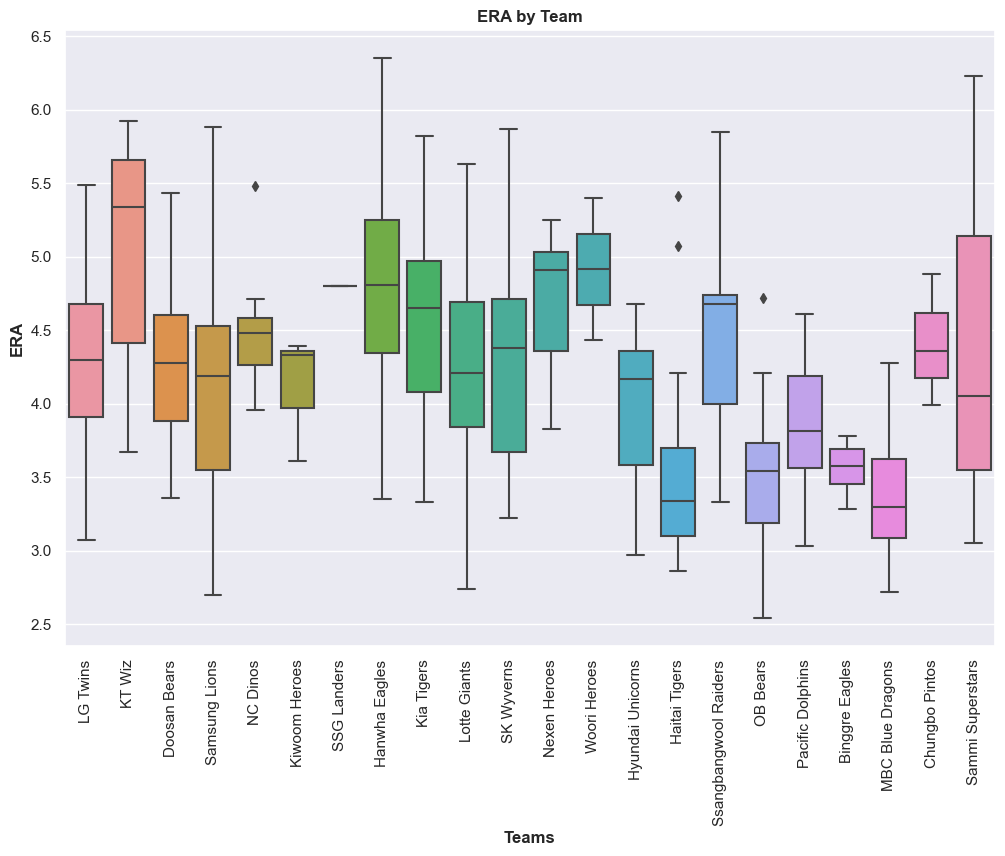

In [456]:
# Boxplot of ERA.

plt.figure(figsize=(12, 8))
sns.boxplot(x ='Team', y ='ERA', data=df)
plt.title('ERA by Team', weight='bold')
plt.xlabel('Teams', weight='bold')
plt.ylabel('ERA', weight='bold')
plt.xticks(rotation = 90)
plt.show()

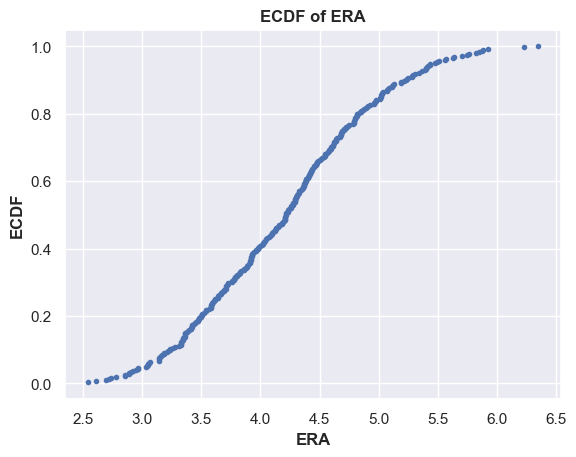

In [457]:
# Empirical Commutative Distribution plot.

# The ECDF plot shows the cumulative distribution of ERA values.
def ecdf(data):
    x = np.sort(data)
    y = np.arange(1, len(data) + 1) / len(data)
    return x, y

x, y = ecdf(df['ERA'])
plt.plot(x, y, marker='.', linestyle='none')
plt.title('ECDF of ERA', weight='bold')
plt.xlabel('ERA', weight='bold')
plt.ylabel('ECDF', weight='bold')
plt.show()

# **_Correlation between the age of players and their ERA:_**

Correlation between Average Age and ERA: 0.25


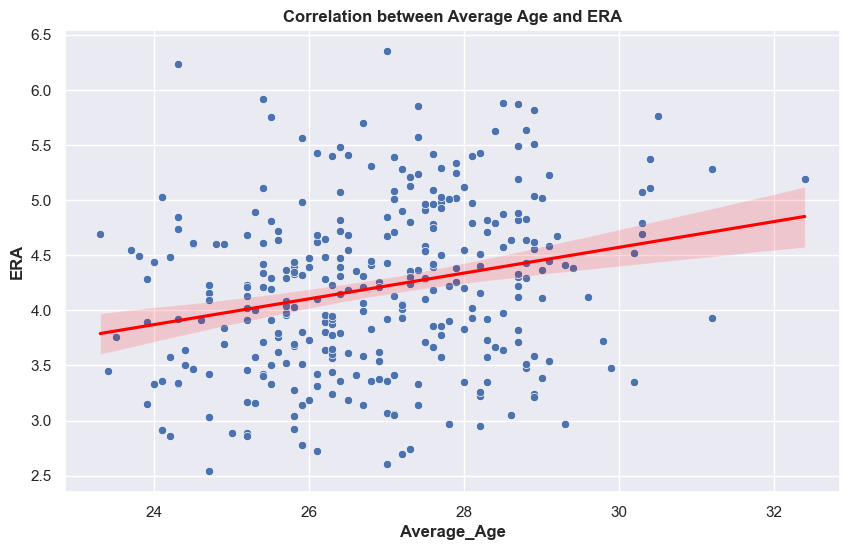

In [458]:
# Calculate the correlation between the average age of players and their ERA
correlation_age_era = df['Average_Age'].corr(df['ERA'])
correlation_age_era_rounded = round(correlation_age_era, 2)
print(f"Correlation between Average Age and ERA: {correlation_age_era_rounded}")

# Scatter plot to visualize the correlation between Average Age and ERA
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Average_Age', y='ERA', data=df)
plt.title('Correlation between Average Age and ERA', weight='bold')
plt.xlabel('Average Age', weight='bold')
plt.ylabel('ERA', weight='bold')

# Plotting the regression line
sns.regplot(x='Average_Age', y='ERA', data=df, scatter=False, color='red')
plt.show()

# **_Highest Average Runs Per Game:_**

In [459]:
# Calculate the team with the highest average runs per game
highest_runs_per_game_team = df.groupby('Team')['Runs_Per_Game'].mean().idxmax()
highest_runs_per_game_value = df.groupby('Team')['Runs_Per_Game'].mean().max()

print(f"Team with highest average runs per game: {highest_runs_per_game_team} with an average of {highest_runs_per_game_value:.2f} runs per game")


Team with highest average runs per game: KT Wiz with an average of 5.43 runs per game


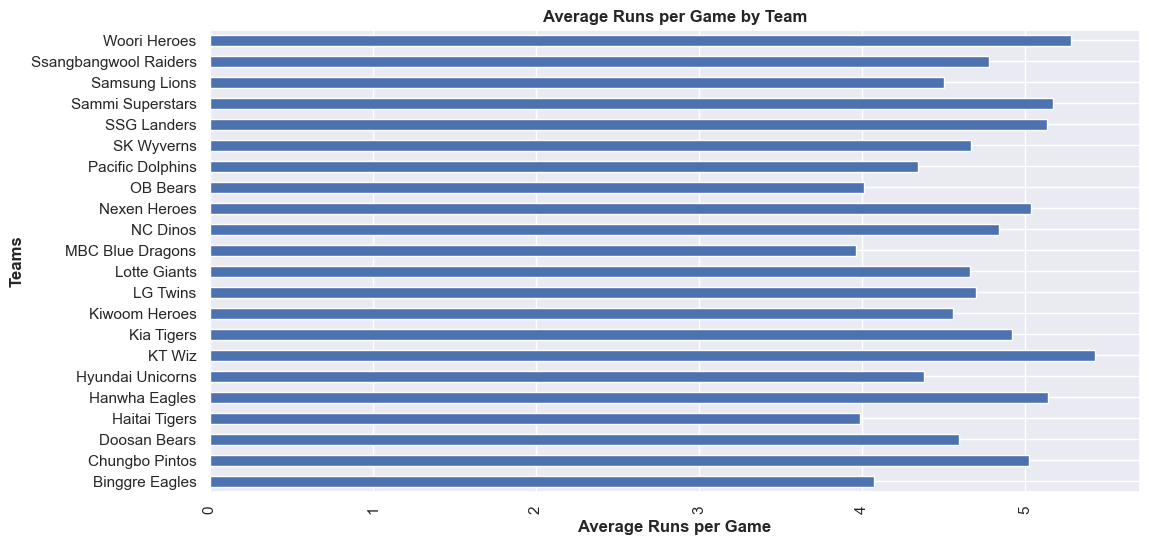

In [460]:
# Calculate the average runs per game for each team
average_runs_per_game = df.groupby('Team')['Runs_Per_Game'].mean()

# Creating a bar plot
plt.figure(figsize = (12, 6))
average_runs_per_game.plot(kind = 'barh', color = 'b' )
plt.title('Average Runs per Game by Team', weight='bold')
plt.xlabel('Average Runs per Game', weight='bold')
plt.ylabel('Teams', weight='bold')
plt.xticks(rotation = 90)
plt.show()


# **_Hits Per 9 Innings:_**

In [461]:
# Calculate the average strikeouts per 9 innings for each team
avg_hits_9 = df.groupby('Team')['Hits_9'].mean()

avg_hits_9

Team
Binggre Eagles            8.537500
Chungbo Pintos            9.933333
Doosan Bears              9.130435
Haitai Tigers             8.215789
Hanwha Eagles             9.425000
Hyundai Unicorns          8.825000
KT Wiz                   10.185714
Kia Tigers                9.376190
Kiwoom Heroes             9.233333
LG Twins                  9.159375
Lotte Giants              9.270000
MBC Blue Dragons          8.687500
NC Dinos                  9.200000
Nexen Heroes              9.633333
OB Bears                  8.329412
Pacific Dolphins          8.812500
SK Wyverns                8.961905
SSG Landers               9.100000
Sammi Superstars          9.633333
Samsung Lions             8.902500
Ssangbangwool Raiders     9.077778
Woori Heroes              9.350000
Name: Hits_9, dtype: float64

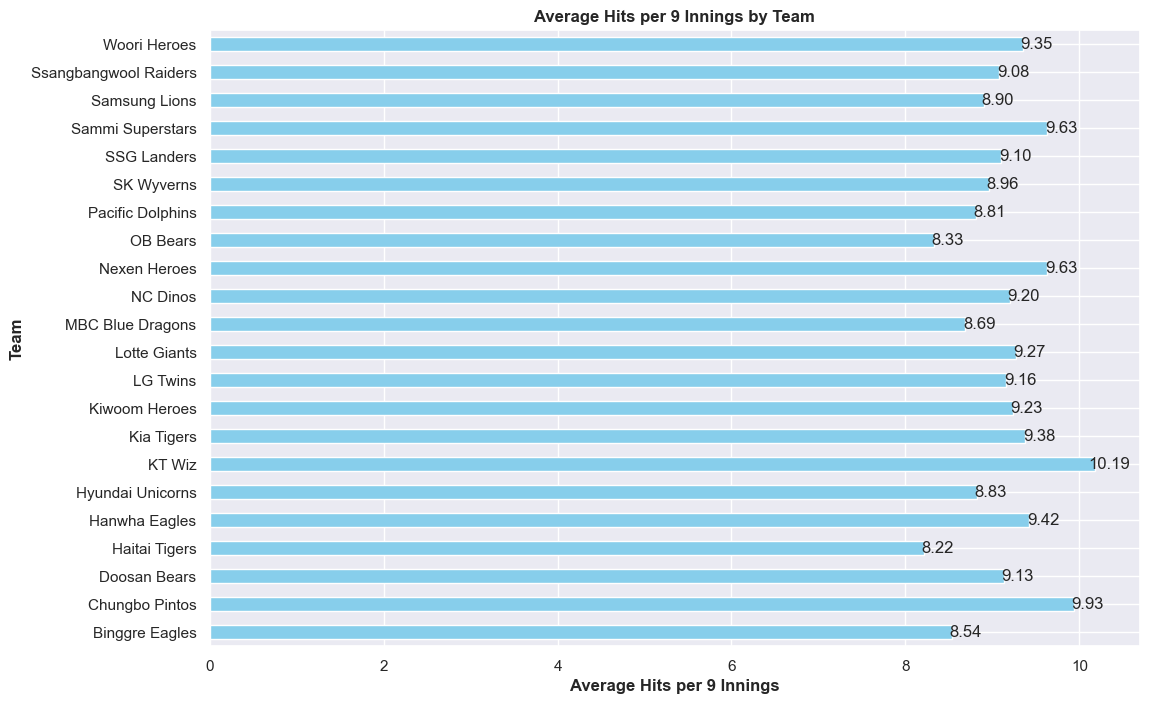

In [462]:
# Calculate the average hits per 9 innings for each team
avg_hits_9 = df.groupby('Team')['Hits_9'].mean()

# Create a horizontal bar plot to visualize the average hits per 9 innings for each team
plt.figure(figsize=(12, 8))
ax = avg_hits_9.plot(kind='barh', color='skyblue')

# Add the hits per 9 innings values on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_width():.2f}', (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='center', va='center', xytext=(10, 0), textcoords='offset points')

plt.title('Average Hits per 9 Innings by Team', weight='bold')
plt.xlabel('Average Hits per 9 Innings', weight='bold')
plt.ylabel('Team', weight='bold')
plt.show()

# **_Win and Losses by Teams:_**

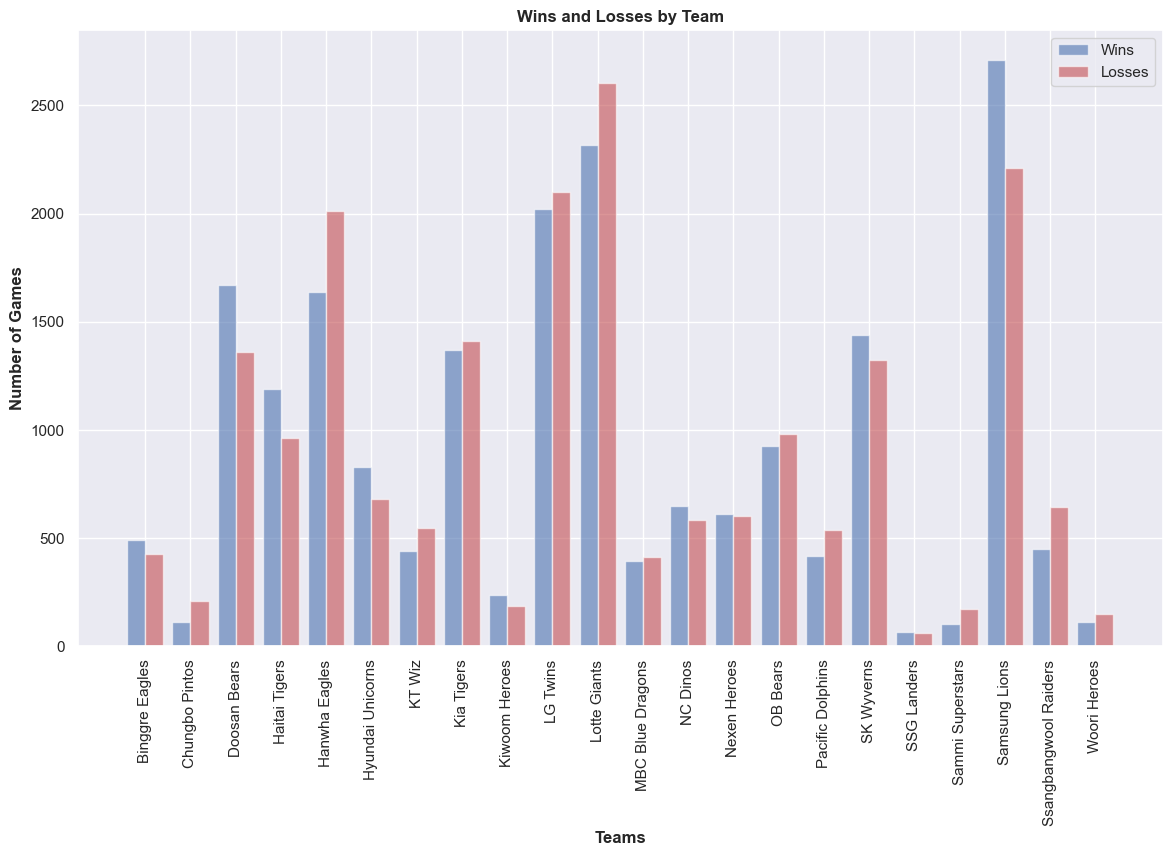

In [463]:
# Prepare the data for plotting
wins_losses = df.groupby('Team')[['Wins', 'Losses']].sum().reset_index()

# Bar plot to show wins and losses grouped by each team
fig, ax = plt.subplots(figsize=(14, 8))

# Set the positions and width for the bars
positions = np.arange(len(wins_losses))
bar_width = 0.4

# Plot wins
ax.bar(positions - bar_width/2, wins_losses['Wins'], width=bar_width, label='Wins', color='b', alpha=0.6)

# Plot losses next to wins
ax.bar(positions + bar_width/2, wins_losses['Losses'], width=bar_width, label='Losses', color='r', alpha=0.6)

ax.set_title('Wins and Losses by Team', weight='bold')
ax.set_xlabel('Teams', weight='bold')
ax.set_ylabel('Number of Games', weight='bold')
ax.set_xticks(positions)
ax.set_xticklabels(wins_losses['Team'])
ax.legend()

plt.xticks(rotation=90)
plt.show()

In [464]:
# This pivot table summarizes the total wins and losses for each team.
pivot_wins_losses = df.pivot_table(index ='Team', values = ['Wins', 'Losses'], aggfunc='sum')

pivot_wins_losses

,Losses,Wins
Team,,
Binggre Eagles,428,493
Chungbo Pintos,209,112
Doosan Bears,1359,1668
Haitai Tigers,964,1189
Hanwha Eagles,2010,1637
Hyundai Unicorns,680,830
KT Wiz,548,441
Kia Tigers,1412,1368
Kiwoom Heroes,187,235


# **_Average Strikeouts Per 9 Innings:_**

In [477]:
# Calculate the average strikeouts per 9 innings for each team
avg_strikeouts_9 = df.groupby('Team')['Strikeouts_9'].mean()

avg_strikeouts_9

Team
Binggre Eagles           4.437500
Chungbo Pintos           3.500000
Doosan Bears             6.539130
Haitai Tigers            5.631579
Hanwha Eagles            6.525000
Hyundai Unicorns         6.533333
KT Wiz                   6.771429
Kia Tigers               6.580952
Kiwoom Heroes            6.666667
LG Twins                 6.003125
Lotte Giants             5.695000
MBC Blue Dragons         3.700000
NC Dinos                 7.266667
Nexen Heroes             6.811111
OB Bears                 4.582353
Pacific Dolphins         4.875000
SK Wyverns               6.819048
SSG Landers              7.100000
Sammi Superstars         3.600000
Samsung Lions            5.915000
Ssangbangwool Raiders    5.188889
Woori Heroes             6.100000
Name: Strikeouts_9, dtype: float64

In [466]:
# This pivot table provides the average ERA and strikeouts per 9 innings for each team.
pivot_era_strikeouts = df.pivot_table(index='Team', values=['ERA', 'Strikeouts_9'], aggfunc='mean')

pivot_era_strikeouts

,ERA,Strikeouts_9
Team,,
Binggre Eagles,3.561250,4.437500
Chungbo Pintos,4.410000,3.500000
Doosan Bears,4.252609,6.539130
Haitai Tigers,3.533158,5.631579
Hanwha Eagles,4.746429,6.525000
Hyundai Unicorns,3.965833,6.533333
KT Wiz,5.010000,6.771429
Kia Tigers,4.554286,6.580952
Kiwoom Heroes,4.110000,6.666667


In [467]:
# The correlation matrix reveals the relationships between different performance metrics.

df_selected = df[['ERA', 'Average_Age', 'Runs_Per_Game', 'Wins', 'Losses', 'Strikeouts_9', 'WHIP', 'Homeruns_9']]

correlation_matrix = df_selected.corr(method='spearman').round(2)

correlation_matrix.style.background_gradient(cmap='Reds')

,ERA,Average_Age,Runs_Per_Game,Wins,Losses,Strikeouts_9,WHIP,Homeruns_9
ERA,1.000000,0.260000,0.980000,-0.140000,0.710000,0.430000,0.910000,0.790000
Average_Age,0.260000,1.000000,0.230000,0.260000,0.110000,0.380000,0.250000,0.230000
Runs_Per_Game,0.980000,0.230000,1.000000,-0.200000,0.700000,0.370000,0.920000,0.770000
Wins,-0.140000,0.260000,-0.200000,1.000000,-0.490000,0.510000,-0.200000,0.060000
Losses,0.710000,0.110000,0.700000,-0.490000,1.000000,0.230000,0.670000,0.440000
Strikeouts_9,0.430000,0.380000,0.370000,0.510000,0.230000,1.000000,0.300000,0.500000
WHIP,0.910000,0.250000,0.920000,-0.200000,0.670000,0.300000,1.000000,0.630000
Homeruns_9,0.790000,0.230000,0.770000,0.060000,0.440000,0.500000,0.630000,1.000000


# **_Top 5 teams with the most strikeouts:_**

In [468]:
# Calculate the total number of strikeouts for each team
total_strikeouts = df.groupby('Team')['Strikeouts'].sum()

# Get the top five teams with the most strikeouts
top_five_teams_strikeouts = total_strikeouts.nlargest(5)

top_five_teams_strikeouts


Team
Samsung Lions    30125
Lotte Giants     28747
LG Twins         25170
Hanwha Eagles    23938
Doosan Bears     20022
Name: Strikeouts, dtype: int64

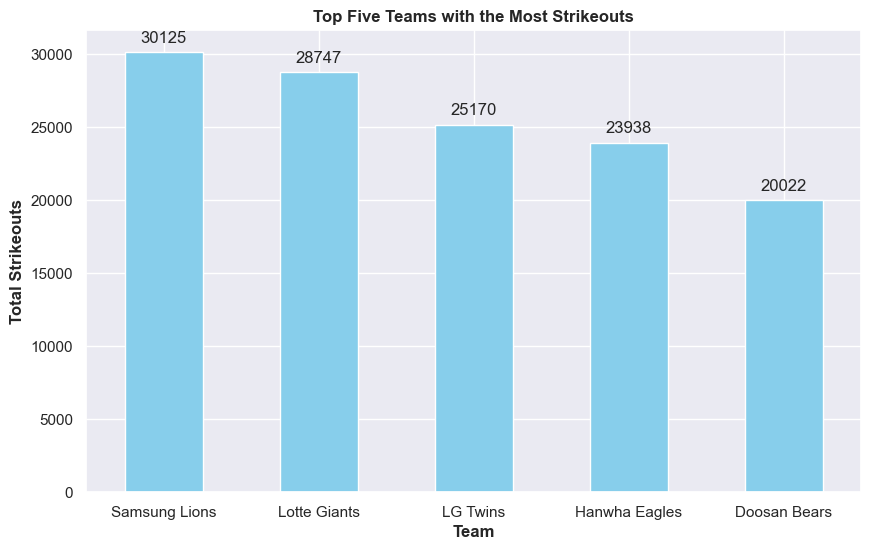

In [469]:
# Calculate the total number of strikeouts for each team
total_strikeouts = df.groupby('Team')['Strikeouts'].sum()

# Get the top five teams with the most strikeouts
top_five_teams_strikeouts = total_strikeouts.nlargest(5)

# Create a bar plot to visualize the top five teams with the most strikeouts
plt.figure(figsize=(10, 6))
ax = top_five_teams_strikeouts.plot(kind='bar', color='skyblue')

# Add the strikeout numbers on top of the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Top Five Teams with the Most Strikeouts', weight='bold')
plt.xlabel('Team', weight='bold')
plt.ylabel('Total Strikeouts', weight='bold')
plt.xticks(rotation = 0)
plt.show()


# **_Team with the highest Walks plus Hits per inning Pitched(WHIP):_**

In [470]:
# Calculate the average WHIP for each team
avg_whip = df.groupby('Team')['WHIP'].mean()
team_highest_whip = avg_whip.idxmax()
highest_whip_value = avg_whip.max()

print(f"Team with highest WHIP: {team_highest_whip} with a WHIP of {highest_whip_value:.2f}")

Team with highest WHIP: KT Wiz with a WHIP of 1.52


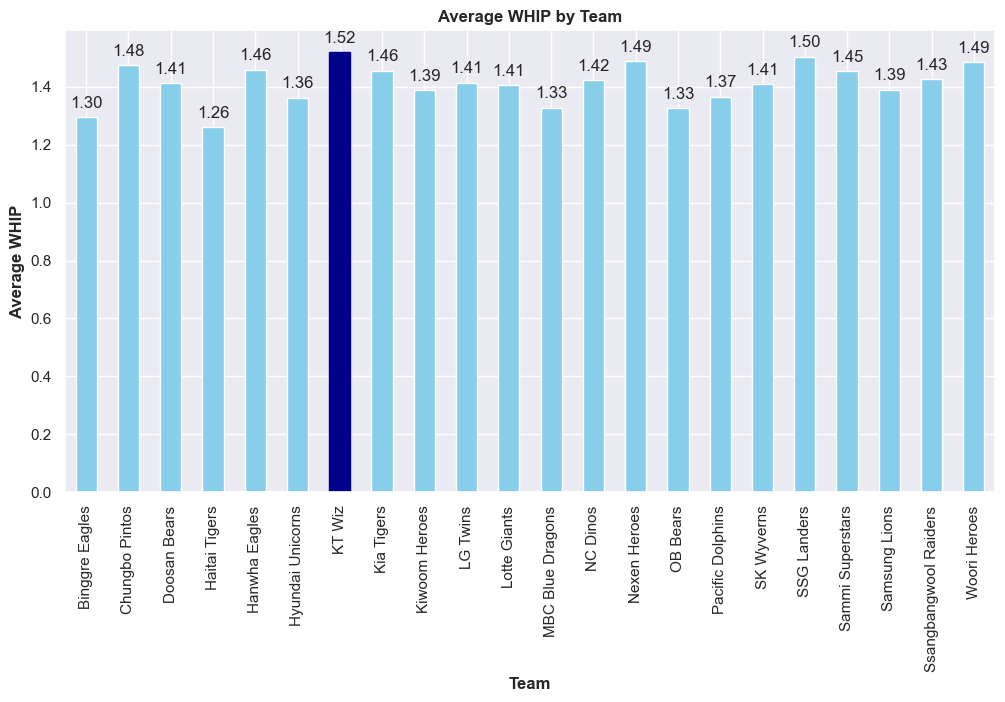

In [471]:
# Create a bar plot to visualize the average WHIP for each team
plt.figure(figsize=(12, 6))
ax = avg_whip.plot(kind='bar', color='skyblue')

# Highlight the team with the highest WHIP
ax.patches[avg_whip.index.get_loc(team_highest_whip)].set_color('darkblue')

# Add the WHIP values on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Average WHIP by Team', weight='bold')
plt.xlabel('Team', weight='bold')
plt.ylabel('Average WHIP', weight='bold')
plt.xticks(rotation=90)
plt.show()

# **_Highest average of Homeruns per 9 innings by a team:_**

In [482]:
# Calculate the average homeruns per 9 innings for each team
avg_homeruns_9 = df.groupby('Team')['Homeruns_9'].mean()

# Identify the team that gave up the most homeruns per 9 innings
team_most_homeruns_9 = avg_homeruns_9.idxmax()
most_homeruns_9_value = avg_homeruns_9.max()

print(f"Team that gave up the most homeruns per 9 innings: {team_most_homeruns_9} with an average of {most_homeruns_9_value:.2f} homeruns per 9 innings")


Team that gave up the most homeruns per 9 innings: Hanwha Eagles with an average of 1.02 homeruns per 9 innings


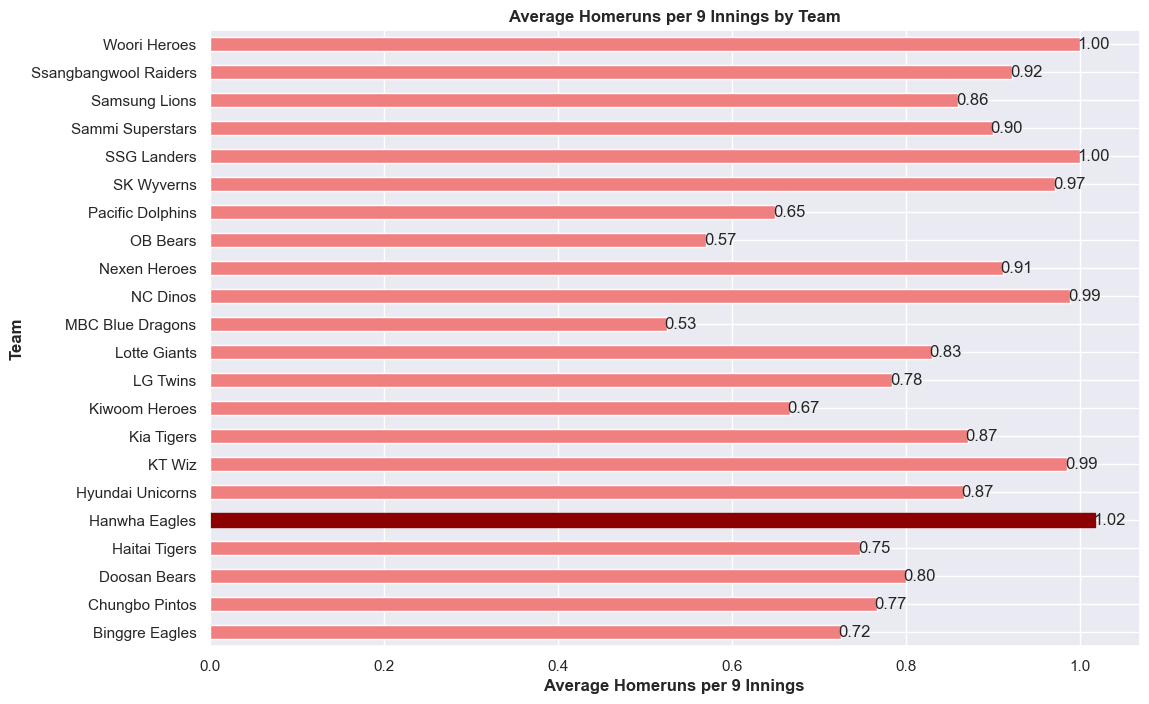

In [481]:
# Calculate the average homeruns per 9 innings for each team
avg_homeruns_9 = df.groupby('Team')['Homeruns_9'].mean()

# Identify the team that gave up the most homeruns per 9 innings
team_most_homeruns_9 = avg_homeruns_9.idxmax()
most_homeruns_9_value = avg_homeruns_9.max()

# Create a horizontal bar plot to visualize the average homeruns per 9 innings for each team
plt.figure(figsize=(12, 8))
ax = avg_homeruns_9.plot(kind='barh', color='lightcoral')

# Highlight the team with the most homeruns per 9 innings
ax.patches[avg_homeruns_9.index.get_loc(team_most_homeruns_9)].set_color('darkred')

# Add the homeruns per 9 innings values on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_width():.2f}', (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='center', va='center', xytext=(10, 0), textcoords='offset points')

plt.title('Average Homeruns per 9 Innings by Team', weight='bold')
plt.xlabel('Average Homeruns per 9 Innings', weight='bold')
plt.ylabel('Team', weight='bold')
plt.show()


# **_Distribution of wild pitches and hit batters:_**

In [474]:
# Calculate the total number of wild pitches and hit batters for each team
wild_pitches_hit_batters = df.groupby('Team')[['Wild_Pitches', 'Hit_Batter']].sum()

wild_pitches_hit_batters

,Wild_Pitches,Hit_Batter
Team,,
Binggre Eagles,376.0,378
Chungbo Pintos,141.0,153
Doosan Bears,1236.0,1670
Haitai Tigers,893.0,1126
Hanwha Eagles,1651.0,2006
Hyundai Unicorns,554.0,673
KT Wiz,484.0,512
Kia Tigers,1214.0,1772
Kiwoom Heroes,154.0,211


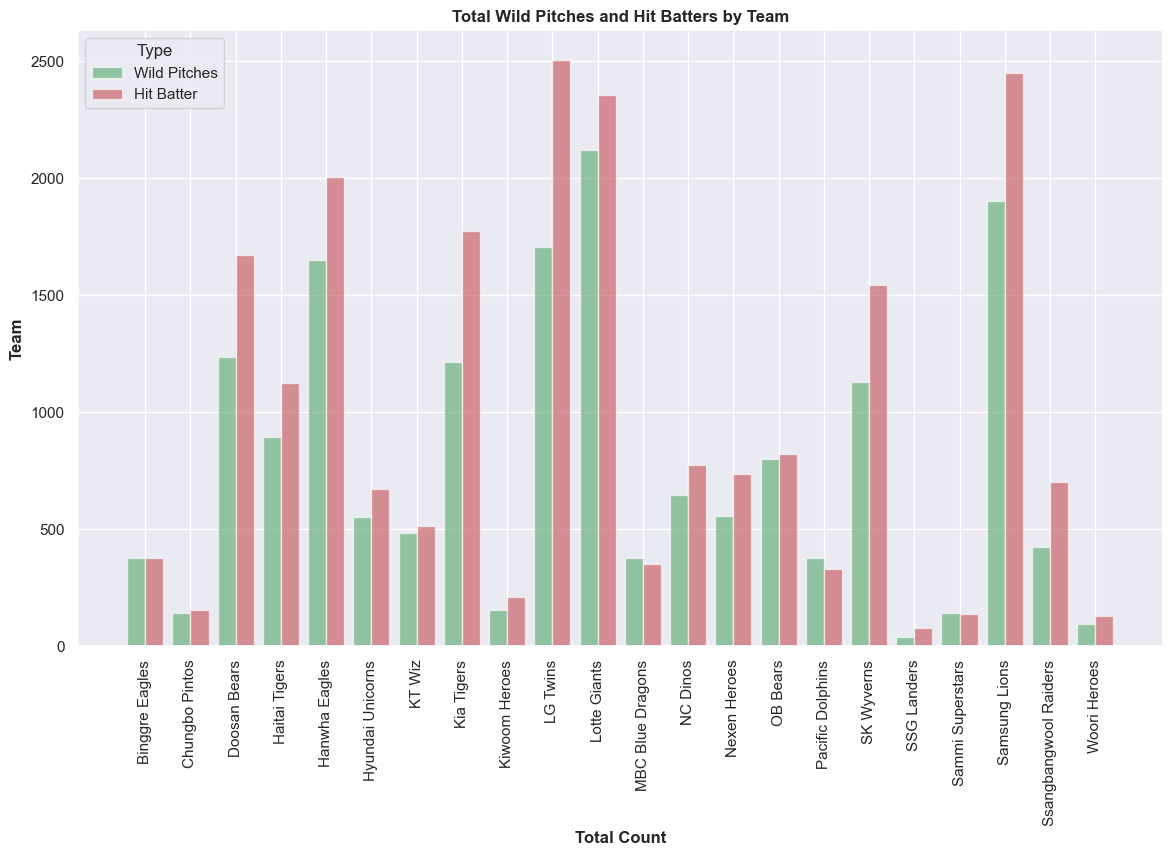

In [475]:
# Prepare the data for plotting
wild_pitches_hit_batters = df.groupby('Team')[['Wild_Pitches', 'Hit_Batter']].sum().reset_index()

# Bar plot to show wild pitches and hit batter grouped by each team
fig, ax = plt.subplots(figsize=(14, 8))

# Set the positions and width for the bars
positions = np.arange(len(wild_pitches_hit_batters))
bar_width = 0.4

# Plot Wild_Pitches
ax.bar(positions - bar_width/2, wild_pitches_hit_batters['Wild_Pitches'], width=bar_width, label='Wild_Pitches', color='g', alpha=0.6)

# Plot Hit_Batter
ax.bar(positions + bar_width/2, wild_pitches_hit_batters['Hit_Batter'], width=bar_width, label='Hit_Batter', color='r', alpha=0.6)

ax.set_title('Total Wild Pitches and Hit Batters by Team', weight='bold')
ax.set_xlabel('Total Count', weight='bold')
ax.set_ylabel('Team', weight='bold')
ax.set_xticks(positions)
ax.set_xticklabels(wild_pitches_hit_batters['Team'])
ax.legend(title='Type', labels=['Wild Pitches', 'Hit Batter'])

plt.xticks(rotation=90)
plt.show()

# **_One-Sample Z-Test:_**

In [489]:
# Parameters for hypothesis testing
population_mean = 4.21
sample_mean = df['ERA'].mean()
sample_std = df['ERA'].std()
sample_size = len(df['ERA'])

# Calculate the Z-score
z_score = (sample_mean - population_mean) / (sample_std / np.sqrt(sample_size))

# Calculate the p-value
p_value = stats.norm.sf(abs(z_score)) * 2

print(f"Z-score: {z_score:.2f}, P-value: {p_value:.2f}")

Z-score: -0.05, P-value: 0.96


# **_Summary:_**
1. #### What is the average ERA (Earned Run Average) across teams?
The average ERA across teams is 4.21.
2. #### Is there a correlation between the age of players and their ERA?
The correlation coefficient between the average age of players and their ERA is approximately 0.25, indicating a weak positive correlation.
3. #### Which team has the highest average runs per game?
The team with the highest average runs per game is the NC Dinos with an average of approximately 5.43 runs per game.
4. #### What is the average hits per 9 innings (H/9) for each team?
The average hits per 9 innings for each team but I only going to put the top five only are the KT Wiz at 10.19,
Chungbo Pintos at 9.93, Nexen Heroes at 9.63, Sammi Superstar at 9.63, and the Kia Tigers at 9.38.
5. #### What is the distribution of wins and losses across teams?
The distribution of wins and losses show that Samsung Lions are the number one team with the most wins and the last place team are Hanwa Eagles with the most losses through years of 1982 - 2021.
6. #### What is the average strikeouts per 9 innings (K/9) for each team?
The average strikeouts per 9 innings for each team but I only going to put the top five only are the NC Dinos at 7.3, SSG Landers at 7.1, SK Wyverns at 6.8, at KT Wiz 6.8, and Kiwoom Heros at 6.7.
7. #### What are the top five teams with the most strikeouts? 
The top five are Samsung Lions at 30125, Lotte Giants at 28747, LG Twins at 25170, Hanwha Eagles at 23938, and Doosan Bears at 20022.
8. #### Which team has the highest WHIP (Walks plus Hits per Inning Pitched) on average?
The team with highest WHIP is the KT Wiz with a WHIP of 1.52.
9. #### What team has the highest average of homeruns per 9 innings? 
The team that has the highest average homeruns per 9 innings is the Hanwha Eagles with an average of 1.02.
10. #### What is the distribution of wild pitches and hit batters across different teams?
The LG Twins had the most hit batters and the Lottel Giants had the most wild pitches.